In [117]:
# Install the required libraries
!pip install prophet

In [118]:
# import dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt

In [119]:
#read in unemployment csv as dataframe
#set index to 'date' column
# set 'date' to datetime
df= pd.read_csv('resources/Unemployment Rates 1978 - 2023.csv',
               parse_dates= True,
               index_col= 'date')
df.head()

,all,16-24,25-54,55-64,65+,less_than_hs,high_school,some_college,bachelor's_degree,advanced_degree,...,white_men_16-24,white_men_25-54,white_men_55-64,white_men_65+,white_men_less_than_hs,white_men_high_school,white_men_some_college,white_men_bachelor's_degree,white_men_advanced_degree,population_over_16
date,,,,,,,,,,,,,,,,,,,,,
2023-07-01,3.6,7.8,3.1,2.4,2.7,7.0,4.8,3.4,2.4,1.7,...,7.0,2.5,2.1,2.4,7.0,3.8,2.8,2.1,1.6,267002000
2023-06-01,3.6,7.8,3.1,2.4,2.8,7.1,4.8,3.4,2.4,1.7,...,7.0,2.5,2.1,2.5,7.0,3.8,2.9,2.1,1.6,266801000
2023-05-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,1.7,...,7.0,2.5,2.1,2.5,6.9,3.8,2.9,2.1,1.6,266618000
2023-04-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,1.7,...,7.0,2.5,2.2,2.5,6.9,3.8,2.9,2.1,1.6,266443000
2023-03-01,3.6,8.0,3.0,2.5,2.8,7.1,4.8,3.5,2.4,1.7,...,7.1,2.5,2.2,2.5,6.8,3.9,2.9,2.1,1.7,266272000


In [120]:
# look at all the columns
df.columns.values

array(['all', '16-24', '25-54', '55-64', '65+', 'less_than_hs',
       'high_school', 'some_college', "bachelor's_degree",
       'advanced_degree', 'women', 'women_16-24', 'women_25-54',
       'women_55-64', 'women_65+', 'women_less_than_hs',
       'women_high_school', 'women_some_college',
       "women_bachelor's_degree", 'women_advanced_degree', 'men',
       'men_16-24', 'men_25-54', 'men_55-64', 'men_65+',
       'men_less_than_hs', 'men_high_school', 'men_some_college',
       "men_bachelor's_degree", 'men_advanced_degree', 'black',
       'black_16-24', 'black_25-54', 'black_55-64', 'black_65+',
       'black_less_than_hs', 'black_high_school', 'black_some_college',
       "black_bachelor's_degree", 'black_advanced_degree', 'black_women',
       'black_women_16-24', 'black_women_25-54', 'black_women_55-64',
       'black_women_65+', 'black_women_less_than_hs',
       'black_women_high_school', 'black_women_some_college',
       "black_women_bachelor's_degree", 'black_women_ad

In [121]:
# keep only the columns we need
unemployment_df = df[[ 'all']]
display(unemployment_df.head(30))
display(unemployment_df.tail(30))

,all
date,
2023-07-01,3.6
2023-06-01,3.6
2023-05-01,3.6
2023-04-01,3.6
2023-03-01,3.6
2023-02-01,3.6
2023-01-01,3.6
2022-12-01,3.6
2022-11-01,3.7


,all
date,
1981-05-01,7.6
1981-04-01,7.6
1981-03-01,7.6
1981-02-01,7.5
1981-01-01,7.4
1980-12-01,7.3
1980-11-01,7.2
1980-10-01,7.0
1980-09-01,6.9


In [122]:
# use .info to learn more about the dataframe
# drop nulls if any 
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 536 entries, 2023-07-01 to 1978-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   all     536 non-null    float64
dtypes: float64(1)
memory usage: 8.4 KB


In [123]:
# sort index 
unemployment_df = unemployment_df.sort_index()
unemployment_df.head(10)

,all
date,
1978-12-01,6.1
1979-01-01,6.1
1979-02-01,6.0
1979-03-01,6.0
1979-04-01,5.9
1979-05-01,5.9
1979-06-01,5.9
1979-07-01,5.8
1979-08-01,5.8


<Axes: xlabel='date'>

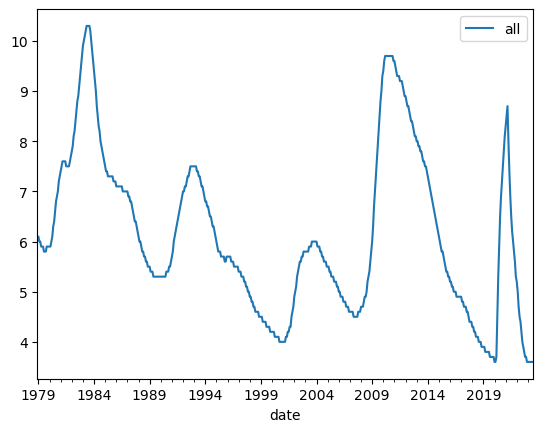

In [124]:
unemployment_df.plot()

In [125]:
# create a new column to shift the umployment rate by 1 month
unemployment_df['Unemployment Rate Shifted'] = unemployment_df['all'].shift(-1)
unemployment_df.head()

,all,Unemployment Rate Shifted
date,,
1978-12-01,6.1,6.1
1979-01-01,6.1,6.0
1979-02-01,6.0,6.0
1979-03-01,6.0,5.9
1979-04-01,5.9,5.9


In [126]:
# drop the 'all' column
unemployment_df = unemployment_df.drop(columns='all')
unemployment_df.head()

,Unemployment Rate Shifted
date,
1978-12-01,6.1
1979-01-01,6.0
1979-02-01,6.0
1979-03-01,5.9
1979-04-01,5.9


In [127]:
# Reset the index so that we recode the columns for Prophet
unemployment_df = unemployment_df.reset_index()

In [128]:
# Label the columns ds and y so that the syntax is recognized by Prophet
unemployment_df = unemployment_df.rename(columns= {'date': 'ds', 'Unemployment Rate Shifted': 'y'})

In [129]:
# View dataframe shape, and the first and last five rows of the mercado_prophet_df DataFrame
display(unemployment_df.shape)
display(unemployment_df.head())
display(unemployment_df.tail())

(536, 2)

,ds,y
0,1978-12-01,6.1
1,1979-01-01,6.0
2,1979-02-01,6.0
3,1979-03-01,5.9
4,1979-04-01,5.9


,ds,y
531,2023-03-01,3.6
532,2023-04-01,3.6
533,2023-05-01,3.6
534,2023-06-01,3.6
535,2023-07-01,NaN


In [130]:
# Sort the DataFrame by `ds` in ascending order
unemployment_df = unemployment_df.sort_values(by=["ds"], ascending=True)

# Display sample data from head and tail
display(unemployment_df.head(10))
display(unemployment_df.tail(10))

,ds,y
0,1978-12-01,6.1
1,1979-01-01,6.0
2,1979-02-01,6.0
3,1979-03-01,5.9
4,1979-04-01,5.9
5,1979-05-01,5.9
6,1979-06-01,5.8
7,1979-07-01,5.8
8,1979-08-01,5.8
9,1979-09-01,5.9


,ds,y
526,2022-10-01,3.7
527,2022-11-01,3.6
528,2022-12-01,3.6
529,2023-01-01,3.6
530,2023-02-01,3.6
531,2023-03-01,3.6
532,2023-04-01,3.6
533,2023-05-01,3.6
534,2023-06-01,3.6
535,2023-07-01,NaN


In [131]:
# create a new employment_df that has a column 'ds' same as unemployment_df['ds']a
# in employment_df create a new column 'y' that is calculated 100 minus the unemployment rate (unemployment_df['y'])
employment_df = unemployment_df[['ds']]
employment_df['y'] = 100 - unemployment_df['y']
employment_df.head()


,ds,y
0,1978-12-01,93.9
1,1979-01-01,94.0
2,1979-02-01,94.0
3,1979-03-01,94.1
4,1979-04-01,94.1


In [132]:
# # remove column y
# unemployment_df = unemployment_df.drop(columns='y')
# unemployment_df.head()

In [133]:
# # rename Employment Rate to y
# unemployment_df = unemployment_df.rename(columns= {'Employment Rate': 'y'})
# unemployment_df.head()

In [134]:
#911 DATA

In [135]:
# reduce the dataset to only the period from 1988 to August 2001
unemployment_df_911_forecast = unemployment_df.loc[(unemployment_df["ds"] >= "1988") & (unemployment_df["ds"] <= "2001-08")]
display(unemployment_df_911_forecast.head(10))
display(unemployment_df_911_forecast.tail(10))

,ds,y
109,1988-01-01,6.0
110,1988-02-01,6.0
111,1988-03-01,5.9
112,1988-04-01,5.8
113,1988-05-01,5.8
114,1988-06-01,5.7
115,1988-07-01,5.7
116,1988-08-01,5.6
117,1988-09-01,5.6
118,1988-10-01,5.5


,ds,y
263,2000-11-01,4.0
264,2000-12-01,4.0
265,2001-01-01,4.0
266,2001-02-01,4.0
267,2001-03-01,4.1
268,2001-04-01,4.1
269,2001-05-01,4.2
270,2001-06-01,4.2
271,2001-07-01,4.3
272,2001-08-01,4.3


<Axes: xlabel='ds'>

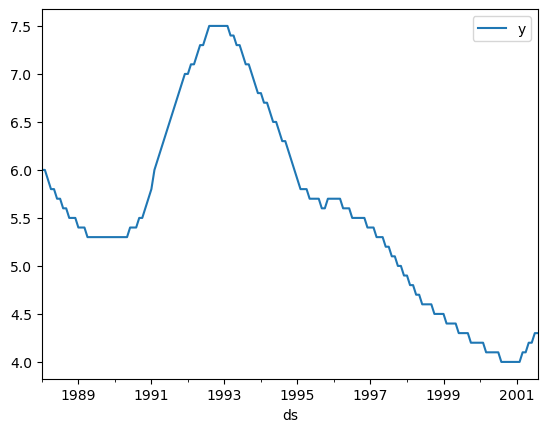

In [136]:
# plot the data
unemployment_df_911_forecast.plot(x = 'ds', y = 'y')

In [137]:
# Call the Prophet function, store as an object
model_911_unemployment = Prophet()
model_911_unemployment

In [138]:
# Fit the Prophet model.
model_911_unemployment.fit(unemployment_df_911_forecast)

20:48:28 - cmdstanpy - INFO - Chain [1] start processing
20:48:28 - cmdstanpy - INFO - Chain [1] done processing


In [139]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 3 years
future_911_unemployment = model_911_unemployment.make_future_dataframe(periods=36, freq='M')

# View the last five rows of the predictions
future_911_unemployment.tail()

/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
195,2004-03-31
196,2004-04-30
197,2004-05-31
198,2004-06-30
199,2004-07-31


In [140]:
# Make the predictions for the trend data using the future_trends DataFrame
future_911_unemployment = model_911_unemployment.predict(future_911_unemployment)

# Display the first five rows of the forecast DataFrame
future_911_unemployment.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1988-01-01,5.921843,5.826933,6.004319,5.921843,5.921843,-0.003880,-0.003880,-0.003880,-0.003880,-0.003880,-0.003880,0.0,0.0,0.0,5.917962
1,1988-02-01,5.882550,5.801282,5.971874,5.882550,5.882550,0.004092,0.004092,0.004092,0.004092,0.004092,0.004092,0.0,0.0,0.0,5.886642
2,1988-03-01,5.845792,5.768727,5.937866,5.845792,5.845792,0.006889,0.006889,0.006889,0.006889,0.006889,0.006889,0.0,0.0,0.0,5.852681
3,1988-04-01,5.806500,5.697673,5.878194,5.806500,5.806500,-0.020675,-0.020675,-0.020675,-0.020675,-0.020675,-0.020675,0.0,0.0,0.0,5.785825
4,1988-05-01,5.768475,5.692297,5.861519,5.768475,5.768475,0.006586,0.006586,0.006586,0.006586,0.006586,0.006586,0.0,0.0,0.0,5.775060


/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


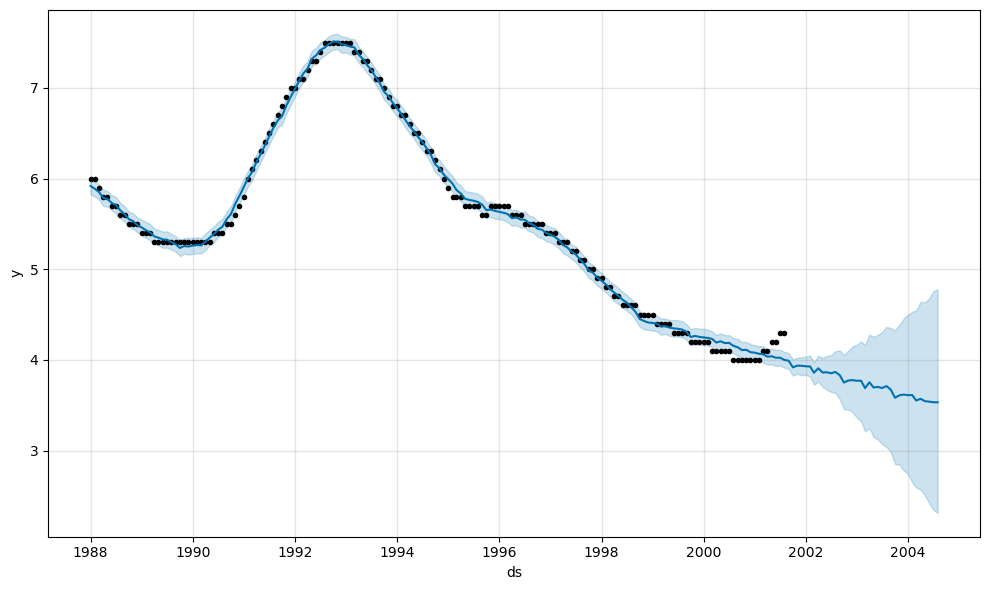

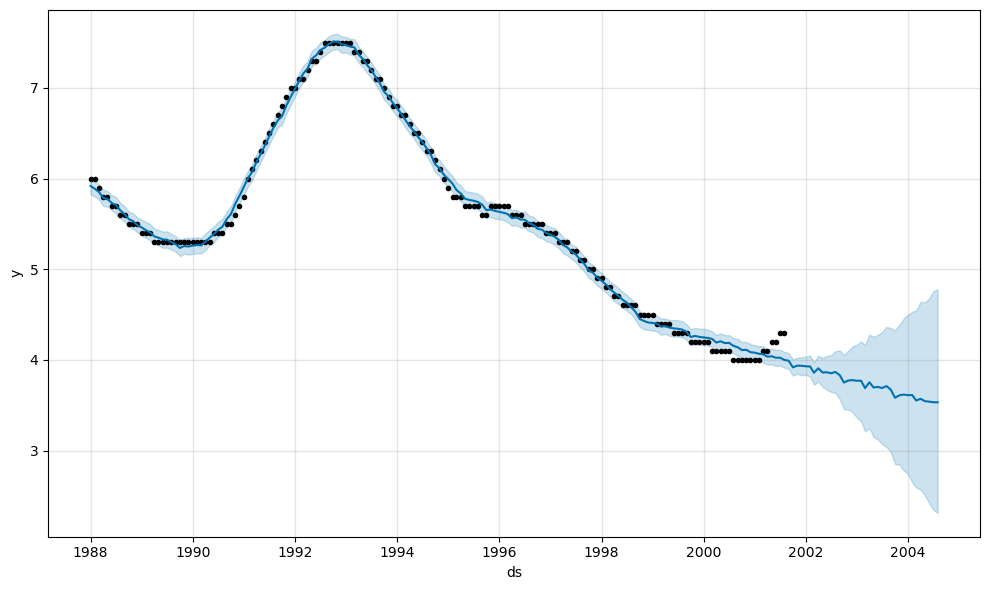

In [141]:
# Plot the Prophet predictions for the Mercado trends data
model_911_unemployment.plot(future_911_unemployment)

/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

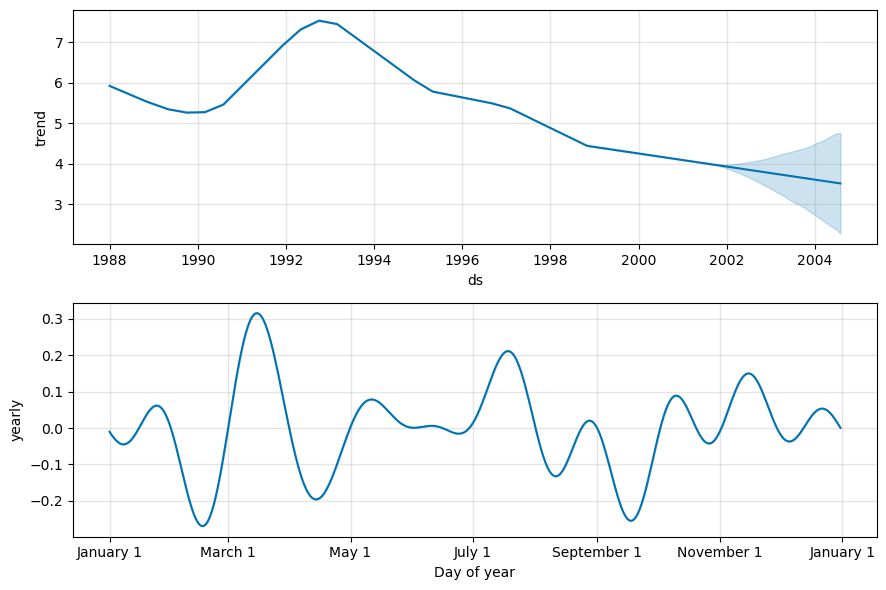

In [142]:
# Use the plot_components function to visualize the forecast results 
figures_911_unemployment = model_911_unemployment.plot_components(future_911_unemployment)

In [143]:
# At this point, it's useful to set the `datetime` index of the forecast data.
future_911_unemployment = future_911_unemployment.set_index(["ds"])
future_911_unemployment.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1988-01-01,5.921843,5.826933,6.004319,5.921843,5.921843,-0.003880,-0.003880,-0.003880,-0.003880,-0.003880,-0.003880,0.0,0.0,0.0,5.917962
1988-02-01,5.882550,5.801282,5.971874,5.882550,5.882550,0.004092,0.004092,0.004092,0.004092,0.004092,0.004092,0.0,0.0,0.0,5.886642
1988-03-01,5.845792,5.768727,5.937866,5.845792,5.845792,0.006889,0.006889,0.006889,0.006889,0.006889,0.006889,0.0,0.0,0.0,5.852681
1988-04-01,5.806500,5.697673,5.878194,5.806500,5.806500,-0.020675,-0.020675,-0.020675,-0.020675,-0.020675,-0.020675,0.0,0.0,0.0,5.785825
1988-05-01,5.768475,5.692297,5.861519,5.768475,5.768475,0.006586,0.006586,0.006586,0.006586,0.006586,0.006586,0.0,0.0,0.0,5.775060


In [144]:
# reduce the dataset to only the period from December 1978 to July 2004
unemployment_df_911_actual = unemployment_df.loc[(unemployment_df["ds"] >= "1988") & (unemployment_df["ds"] <= "2004-07")].reset_index(drop= True)
display(unemployment_df_911_actual.head(10))
display(unemployment_df_911_actual.tail(10))

,ds,y
0,1988-01-01,6.0
1,1988-02-01,6.0
2,1988-03-01,5.9
3,1988-04-01,5.8
4,1988-05-01,5.8
5,1988-06-01,5.7
6,1988-07-01,5.7
7,1988-08-01,5.6
8,1988-09-01,5.6
9,1988-10-01,5.5


,ds,y
189,2003-10-01,6.0
190,2003-11-01,6.0
191,2003-12-01,6.0
192,2004-01-01,5.9
193,2004-02-01,5.9
194,2004-03-01,5.9
195,2004-04-01,5.8
196,2004-05-01,5.8
197,2004-06-01,5.7
198,2004-07-01,5.7


<Axes: xlabel='ds'>

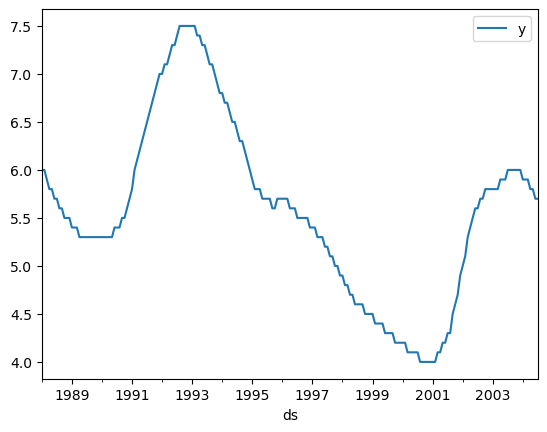

In [145]:
# Plot the data
unemployment_df_911_actual.plot(x = 'ds', y = 'y')

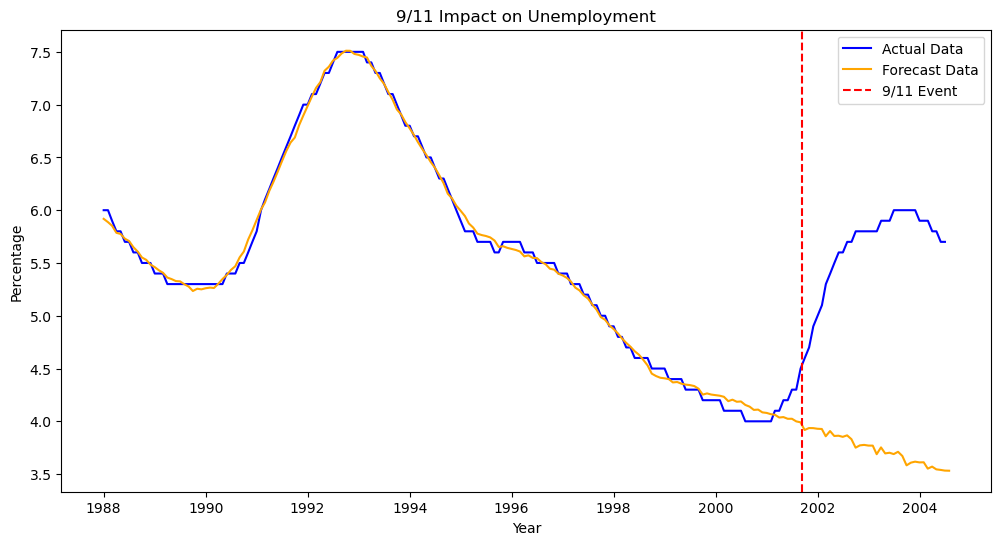

In [146]:
# Assuming 'actual_data' and 'forecast_data' are your DataFrames
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(unemployment_df_911_actual['ds'],unemployment_df_911_actual['y'], label='Actual Data', color='blue')

# Plot forecast data
plt.plot(future_911_unemployment.index,future_911_unemployment['yhat'], label='Forecast Data', color='orange')

# Mark the 9/11 event
event_date = pd.to_datetime('2001-09-11')
plt.axvline(x=event_date, color='red', linestyle='--', label='9/11 Event')

# Add titles and labels
plt.title('9/11 Impact on Unemployment')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()

# Show the plot
plt.show()

In [147]:
#Katrina DATA

In [148]:
# Unemployment Rate

In [149]:
# reduce the dataset to only the period from September 1988 to August 2005
unemployment_df_katrina_forecast = unemployment_df.loc[(unemployment_df["ds"] >= "1988") & (unemployment_df["ds"] <= "2005-08")].reset_index(drop=True)
display(unemployment_df_katrina_forecast.head(10))
display(unemployment_df_katrina_forecast.tail(10))

,ds,y
0,1988-01-01,6.0
1,1988-02-01,6.0
2,1988-03-01,5.9
3,1988-04-01,5.8
4,1988-05-01,5.8
5,1988-06-01,5.7
6,1988-07-01,5.7
7,1988-08-01,5.6
8,1988-09-01,5.6
9,1988-10-01,5.5


,ds,y
202,2004-11-01,5.5
203,2004-12-01,5.5
204,2005-01-01,5.5
205,2005-02-01,5.4
206,2005-03-01,5.4
207,2005-04-01,5.3
208,2005-05-01,5.3
209,2005-06-01,5.3
210,2005-07-01,5.2
211,2005-08-01,5.2


<Axes: xlabel='ds'>

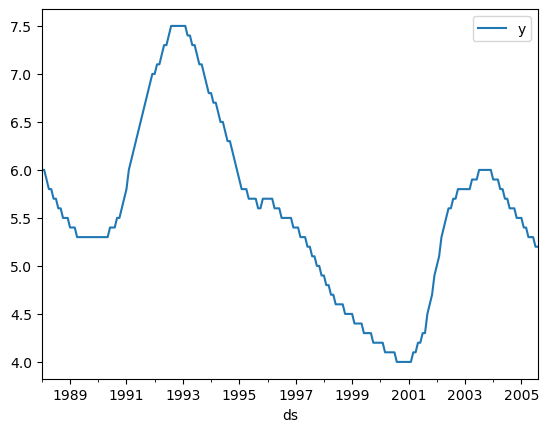

In [150]:
# plot the data
unemployment_df_katrina_forecast.plot(x = 'ds', y = 'y')

In [151]:
# Call the Prophet function, store as an object
model_katrina_unemployment = Prophet()
model_katrina_unemployment

In [152]:
# Fit the Prophet model.
model_katrina_unemployment.fit(unemployment_df_katrina_forecast)

20:48:29 - cmdstanpy - INFO - Chain [1] start processing
20:48:29 - cmdstanpy - INFO - Chain [1] done processing


In [153]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 3 years
future_katrina_unemployment = model_katrina_unemployment.make_future_dataframe(periods=36, freq='M')
# View the last five rows of the predictions
future_katrina_unemployment.tail()

/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
243,2008-03-31
244,2008-04-30
245,2008-05-31
246,2008-06-30
247,2008-07-31


In [154]:
# Make the predictions for the trend data using the future_trends DataFrame
future_katrina_unemployment = model_katrina_unemployment.predict(future_katrina_unemployment)
# Display the first five rows of the forecast DataFrame
future_katrina_unemployment.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1988-01-01,5.250675,4.841758,5.766969,5.250675,5.250675,0.047497,0.047497,0.047497,0.047497,0.047497,0.047497,0.0,0.0,0.0,5.298172
1,1988-02-01,5.277304,4.872472,5.851951,5.277304,5.277304,0.079460,0.079460,0.079460,0.079460,0.079460,0.079460,0.0,0.0,0.0,5.356763
2,1988-03-01,5.302214,4.902917,5.875515,5.302214,5.302214,0.075037,0.075037,0.075037,0.075037,0.075037,0.075037,0.0,0.0,0.0,5.377252
3,1988-04-01,5.328843,4.765355,5.766814,5.328843,5.328843,-0.029044,-0.029044,-0.029044,-0.029044,-0.029044,-0.029044,0.0,0.0,0.0,5.299799
4,1988-05-01,5.354613,4.841184,5.768673,5.354613,5.354613,-0.044591,-0.044591,-0.044591,-0.044591,-0.044591,-0.044591,0.0,0.0,0.0,5.310021


/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


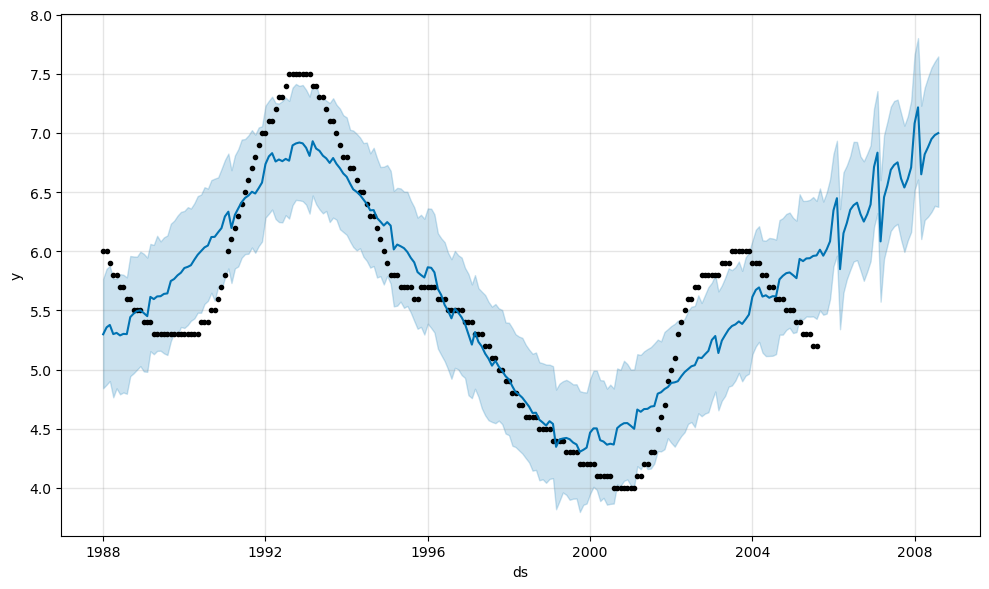

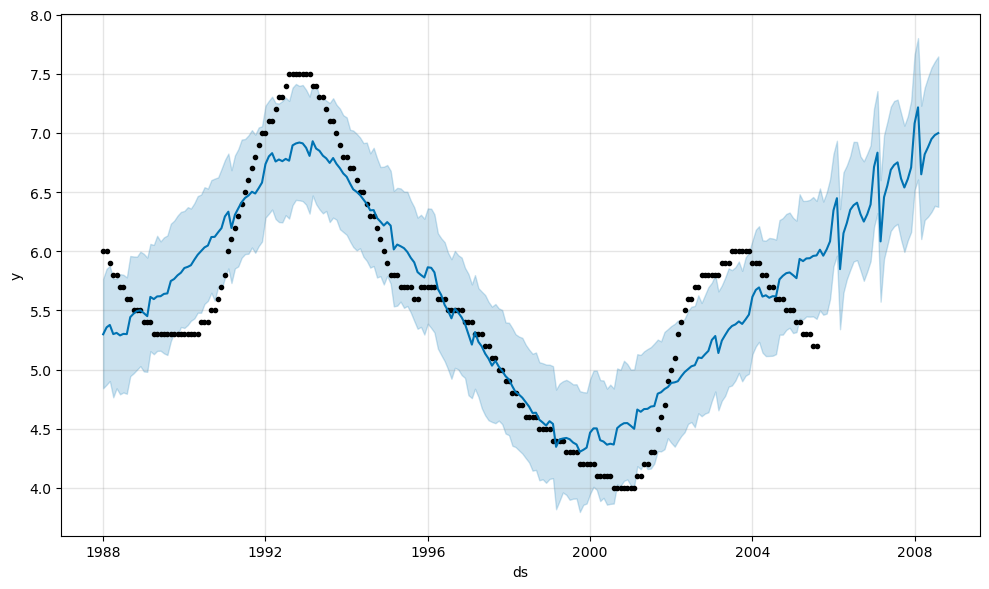

In [155]:
# Plot the Prophet predictions for the Mercado trends data
model_katrina_unemployment.plot(future_katrina_unemployment)

/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

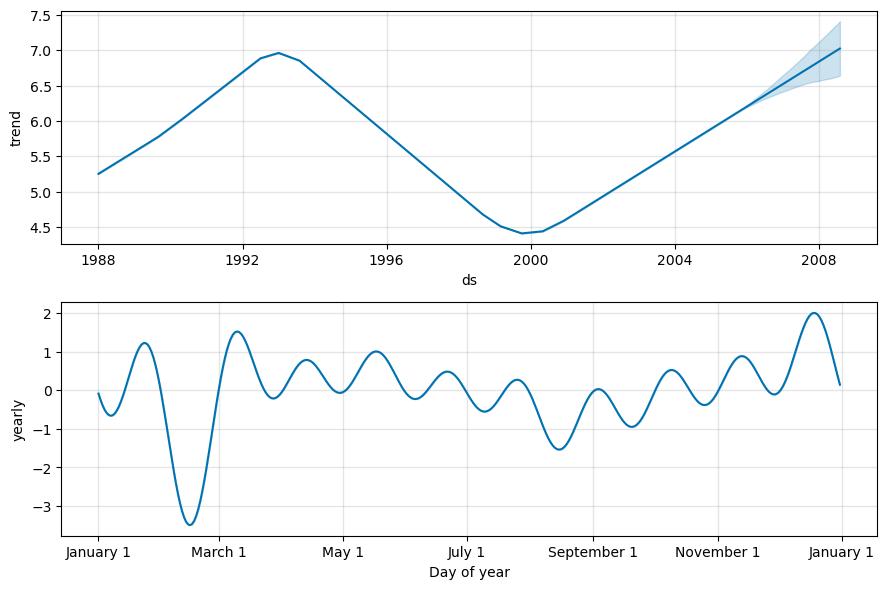

In [156]:
# Use the plot_components function to visualize the forecast results 
figures_katrina_unemployment = model_katrina_unemployment.plot_components(future_katrina_unemployment)

In [157]:
# At this point, it's useful to set the `datetime` index of the forecast data.
future_katrina_unemployment = future_katrina_unemployment.set_index(["ds"])
future_katrina_unemployment.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1988-01-01,5.250675,4.841758,5.766969,5.250675,5.250675,0.047497,0.047497,0.047497,0.047497,0.047497,0.047497,0.0,0.0,0.0,5.298172
1988-02-01,5.277304,4.872472,5.851951,5.277304,5.277304,0.079460,0.079460,0.079460,0.079460,0.079460,0.079460,0.0,0.0,0.0,5.356763
1988-03-01,5.302214,4.902917,5.875515,5.302214,5.302214,0.075037,0.075037,0.075037,0.075037,0.075037,0.075037,0.0,0.0,0.0,5.377252
1988-04-01,5.328843,4.765355,5.766814,5.328843,5.328843,-0.029044,-0.029044,-0.029044,-0.029044,-0.029044,-0.029044,0.0,0.0,0.0,5.299799
1988-05-01,5.354613,4.841184,5.768673,5.354613,5.354613,-0.044591,-0.044591,-0.044591,-0.044591,-0.044591,-0.044591,0.0,0.0,0.0,5.310021


In [158]:
# reduce the dataset to only the period from 1988 to July 2008
unemployment_df_katrina_actual = unemployment_df.loc[(unemployment_df["ds"] >= "1988") & (unemployment_df["ds"] <= "2008-07")]
display(unemployment_df_katrina_actual.head(10))
display(unemployment_df_katrina_actual.tail(10))

,ds,y
109,1988-01-01,6.0
110,1988-02-01,6.0
111,1988-03-01,5.9
112,1988-04-01,5.8
113,1988-05-01,5.8
114,1988-06-01,5.7
115,1988-07-01,5.7
116,1988-08-01,5.6
117,1988-09-01,5.6
118,1988-10-01,5.5


,ds,y
346,2007-10-01,4.6
347,2007-11-01,4.6
348,2007-12-01,4.7
349,2008-01-01,4.7
350,2008-02-01,4.7
351,2008-03-01,4.8
352,2008-04-01,4.9
353,2008-05-01,4.9
354,2008-06-01,5.0
355,2008-07-01,5.2


<Axes: xlabel='ds'>

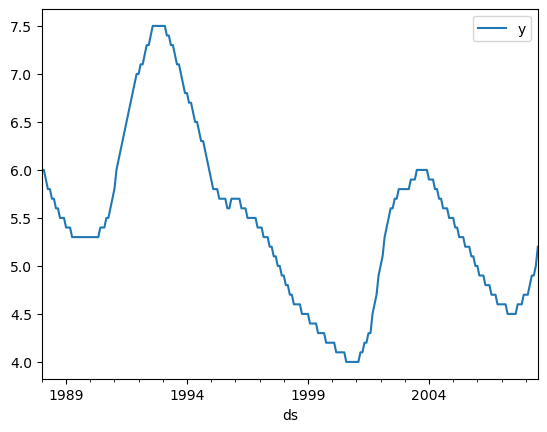

In [159]:
# Plot the data
unemployment_df_katrina_actual.plot(x = 'ds', y = 'y')

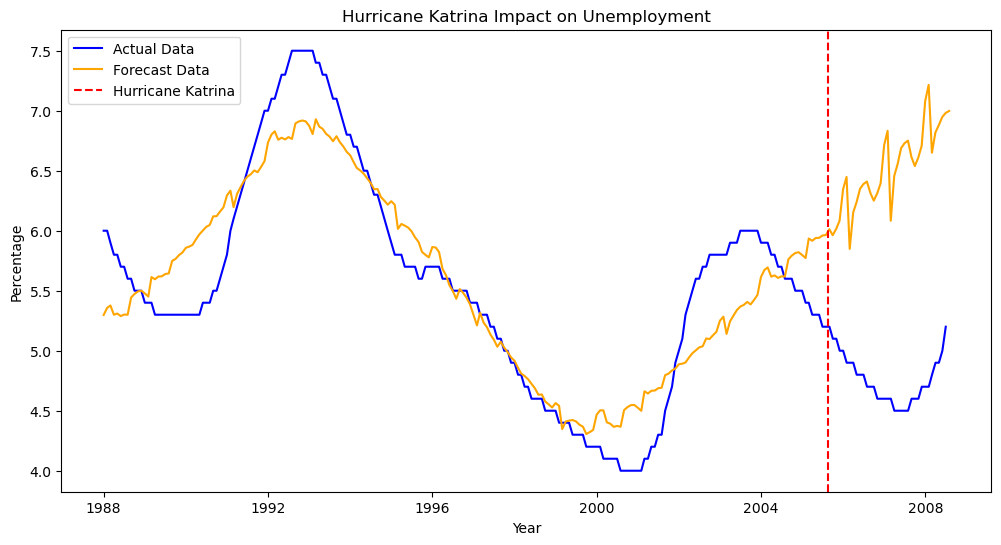

In [160]:
# Assuming 'actual_data' and 'forecast_data' are your DataFrames
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(unemployment_df_katrina_actual['ds'],unemployment_df_katrina_actual['y'], label='Actual Data', color='blue')

# Plot forecast data
plt.plot(future_katrina_unemployment.index,future_katrina_unemployment['yhat'], label='Forecast Data', color='orange')

# Mark the Katrina event
event_date = pd.to_datetime('2005-08-23')
plt.axvline(x=event_date, color='red', linestyle='--', label='Hurricane Katrina')

# Add titles and labels
plt.title('Hurricane Katrina Impact on Unemployment')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()

# Show the plot
plt.show()

In [161]:
# reduce the dataset to only the period from December 1988 to August 2001
employment_df_911= employment_df.loc[(employment_df["ds"] >= "1988") & (employment_df["ds"] <= "2001-08")]
display(employment_df_911.head(10))
display(employment_df_911.tail(10))

,ds,y
109,1988-01-01,94.0
110,1988-02-01,94.0
111,1988-03-01,94.1
112,1988-04-01,94.2
113,1988-05-01,94.2
114,1988-06-01,94.3
115,1988-07-01,94.3
116,1988-08-01,94.4
117,1988-09-01,94.4
118,1988-10-01,94.5


,ds,y
263,2000-11-01,96.0
264,2000-12-01,96.0
265,2001-01-01,96.0
266,2001-02-01,96.0
267,2001-03-01,95.9
268,2001-04-01,95.9
269,2001-05-01,95.8
270,2001-06-01,95.8
271,2001-07-01,95.7
272,2001-08-01,95.7


In [162]:
# Call the Prophet function, store as an object
model_911_employment = Prophet()
model_911_employment

In [163]:
# Fit the Prophet model.
model_911_employment.fit(employment_df_911)

20:48:29 - cmdstanpy - INFO - Chain [1] start processing
20:48:29 - cmdstanpy - INFO - Chain [1] done processing


In [164]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 3 years
future_911_employment = model_911_employment.make_future_dataframe(periods=36, freq='M')

# View the last five rows of the predictions
future_911_employment.tail()

/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
195,2004-03-31
196,2004-04-30
197,2004-05-31
198,2004-06-30
199,2004-07-31


In [165]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_911_employment = model_911_employment.predict(future_911_employment)

# Display the first five rows of the forecast DataFrame
forecast_911_employment.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1988-01-01,93.974496,93.918780,94.067200,93.974496,93.974496,0.018091,0.018091,0.018091,0.018091,0.018091,0.018091,0.0,0.0,0.0,93.992587
1,1988-02-01,94.040537,93.968871,94.122539,94.040537,94.040537,0.008734,0.008734,0.008734,0.008734,0.008734,0.008734,0.0,0.0,0.0,94.049272
2,1988-03-01,94.102318,94.031949,94.181439,94.102318,94.102318,0.003869,0.003869,0.003869,0.003869,0.003869,0.003869,0.0,0.0,0.0,94.106187
3,1988-04-01,94.168359,94.114369,94.262497,94.168359,94.168359,0.018536,0.018536,0.018536,0.018536,0.018536,0.018536,0.0,0.0,0.0,94.186895
4,1988-05-01,94.232270,94.130947,94.281206,94.232270,94.232270,-0.022702,-0.022702,-0.022702,-0.022702,-0.022702,-0.022702,0.0,0.0,0.0,94.209568


/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


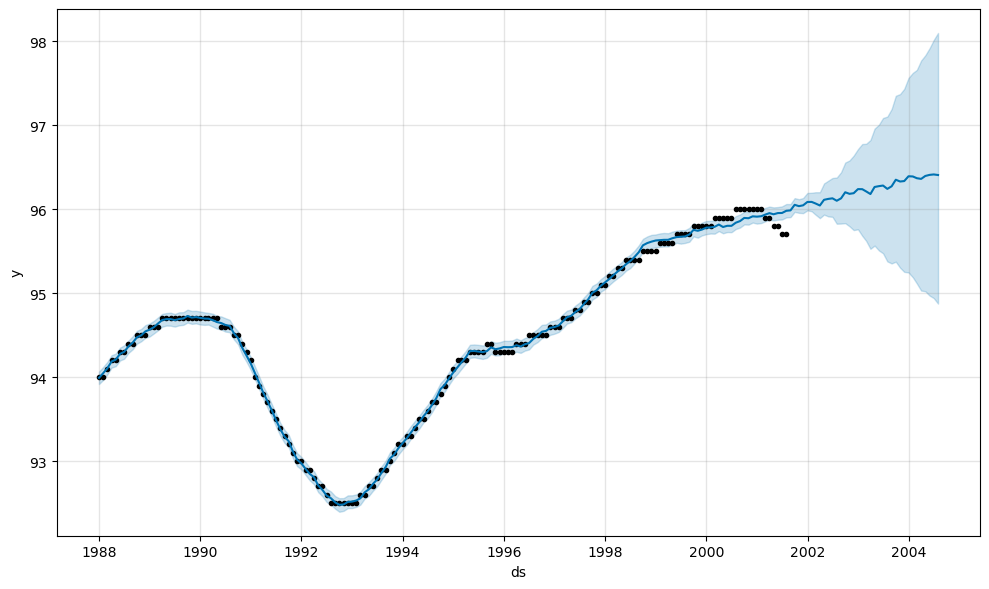

In [166]:
# Plot the Prophet predictions for the 9/11 employment trends data
figure =model_911_employment.plot(forecast_911_employment)

In [167]:
# reduce the dataset to only the period from September 1988 to August 2005
employment_df_katrina = employment_df.loc[(employment_df["ds"] >= "1988-09") & (employment_df["ds"] <= "2005-08")]
display(employment_df_katrina.head(10))
display(employment_df_katrina.tail(10))

,ds,y
117,1988-09-01,94.4
118,1988-10-01,94.5
119,1988-11-01,94.5
120,1988-12-01,94.5
121,1989-01-01,94.6
122,1989-02-01,94.6
123,1989-03-01,94.6
124,1989-04-01,94.7
125,1989-05-01,94.7
126,1989-06-01,94.7


,ds,y
311,2004-11-01,94.5
312,2004-12-01,94.5
313,2005-01-01,94.5
314,2005-02-01,94.6
315,2005-03-01,94.6
316,2005-04-01,94.7
317,2005-05-01,94.7
318,2005-06-01,94.7
319,2005-07-01,94.8
320,2005-08-01,94.8


In [168]:
# Call the Prophet function, store as an object
model_katrina_employment = Prophet()
model_katrina_employment

In [169]:
# Fit the Prophet model.
model_katrina_employment.fit(employment_df_katrina)

20:48:30 - cmdstanpy - INFO - Chain [1] start processing
20:48:30 - cmdstanpy - INFO - Chain [1] done processing


In [170]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 3 years
future_katrina_employment = model_katrina_employment.make_future_dataframe(periods=36, freq='M')
# View the last five rows of the predictions
future_katrina_employment.tail()

/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
235,2008-03-31
236,2008-04-30
237,2008-05-31
238,2008-06-30
239,2008-07-31


In [171]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_katrina_employment = model_katrina_employment.predict(future_katrina_employment)
# Display the first five rows of the forecast DataFrame
forecast_katrina_employment.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1988-09-01,94.487040,94.308187,94.597536,94.487040,94.487040,-0.042015,-0.042015,-0.042015,-0.042015,-0.042015,-0.042015,0.0,0.0,0.0,94.445025
1,1988-10-01,94.503816,94.345942,94.624295,94.503816,94.503816,-0.025321,-0.025321,-0.025321,-0.025321,-0.025321,-0.025321,0.0,0.0,0.0,94.478495
2,1988-11-01,94.521150,94.373197,94.668193,94.521150,94.521150,-0.005208,-0.005208,-0.005208,-0.005208,-0.005208,-0.005208,0.0,0.0,0.0,94.515943
3,1988-12-01,94.537926,94.416563,94.698742,94.537926,94.537926,0.019209,0.019209,0.019209,0.019209,0.019209,0.019209,0.0,0.0,0.0,94.557135
4,1989-01-01,94.555261,94.454948,94.738615,94.555261,94.555261,0.034776,0.034776,0.034776,0.034776,0.034776,0.034776,0.0,0.0,0.0,94.590036


/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


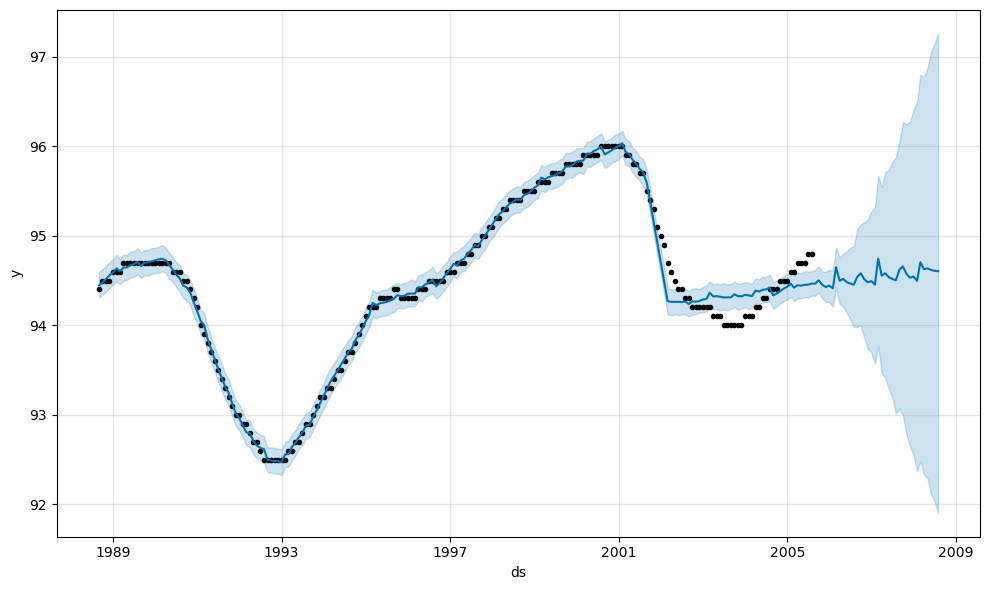

In [172]:
# Plot the Prophet predictions for the Katrina employment trends data
figure = model_katrina_employment.plot(forecast_katrina_employment)

In [173]:
# export employment_df as csv
# export forecast_911_employment as csv
# export forecast_katrina_employment as csv

employment_df.to_csv('resources/employment.csv', index = False)
forecast_911_employment.to_csv('resources/forecast_911_employment.csv', index = False)
forecast_katrina_employment.to_csv('resources/forecast_katrina_employment.csv', index = False)

In [174]:
# export unemployment_df as csv
# export future_911_unemployment csv
# export future_katrina_unemployment as csv
unemployment_df.to_csv('resources/unemployment_cleaned.csv', index = False)
future_911_unemployment.to_csv('resources/forecast_911_unemployment.csv')
future_katrina_unemployment.to_csv('resources/forecast_katrina_unemployment.csv')